In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

#### Dataset Discription
___

Dataset : Seeds  
Obtained from kaggle https://www.kaggle.com/datasets/rwzhang/seeds-dataset  
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment.  
Has 10 columns (All except 'Unnamed: 8' and 'Unnamed: 9' used in this prediction)

In [2]:
# Read the data from the csv file
df_rawData = pd.read_csv('seeds_dataset.csv')

In [7]:
# Checking to see how many rows we have in this dataset
df_rawData.shape[0]

210

In [11]:
df_rawData

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


### Clean and re-Organize Data
Drop 'Unnamed: 8' and 'Unnamed: 9'  
Change 'Class (1, 2, 3)' to 'Variety'  
___

In [5]:
# Drop unwanted columns
df_rawData.drop(['Unnamed: 8', 'Unnamed: 9'], axis='columns', inplace=True)

In [8]:
# Rename the variety column
df_rawData = df_rawData.rename(columns={'Class (1, 2, 3)': 'Variety'})

In [12]:
# Rename the variety column
df_rawData = df_rawData.rename(columns={'Class (1, 2, 3)': 'Variety'})
df_rawData.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [13]:
# Find out the unique quality levels in the dataset.
df_rawData['Variety'].unique()

array([1, 2, 3], dtype=int64)

In [18]:
# Set the number of clusters (3 here because we already know our dataset has 3 types of flowers) 
km = KMeans(n_clusters=3) # Compiles the model
yp = km.fit_predict(df_rawData) # Fit is where the training happens. (Fit_Predict does the training first and then does the prediction. ) 
yp

c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
yp[50:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [22]:
df_rawData['cluster'] = yp
df_rawData.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety,cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,1


In [21]:
df_rawData.cluster.unique()

array([0, 1, 2])

In [23]:
df1 = df_rawData[df_rawData.cluster==0]
df2 = df_rawData[df_rawData.cluster==1]
df3 = df_rawData[df_rawData.cluster==2]

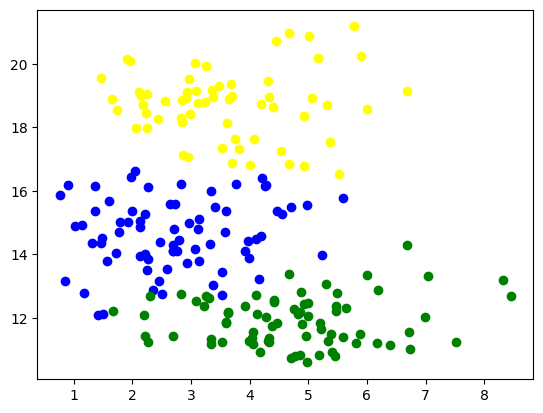

In [24]:
plt.scatter(df1['Asymmetry coefficient'],df1['Area'],color='blue')
plt.scatter(df2['Asymmetry coefficient'],df2['Area'],color='green')
plt.scatter(df3['Asymmetry coefficient'],df3['Area'],color='yellow')

**Elbow Plot**

In [25]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_rawData)
    sse.append(km.inertia_)

c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

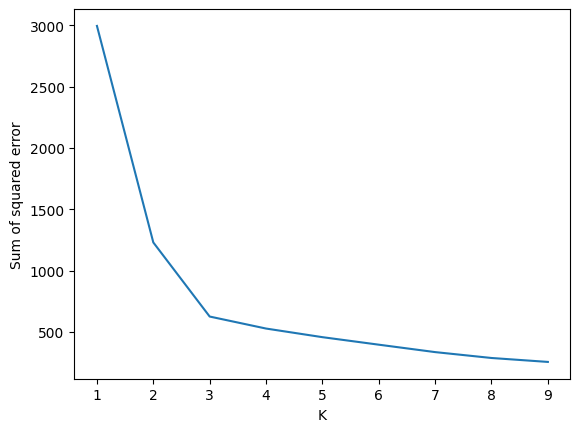

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)